# Установка библиотек

In [335]:
import pandas as pd #для работы с таблицами

Для автоматического применения статистического критерия (теста) используется модуль `stats` библиотеки `scipy`.

Этот модуль содержит большое количество вероятностных распределений, корреляционные функции и статистические тесты и многое другое.

Также активно используется библиотека `statsmodels`

Для установки библиотеки `scipy` и `statsmodels` можно воспользоваться менеджером пакетов `pip`.


# Загрузка данных

Для скачивания данных используем команду `!wget`. 

Данные появятся в локальной директории.

Мы будем использовать информацию о диаметре пицц разных производителей.

In [336]:
#import wget
#url = 'https://raw.githubusercontent.com/harika-bonthu/Hypothesis-test-examples/main/pizzas.csv'
#pizza = wget.download(url)
#print(pizza)

Загрузим данные в память ноутбука.

In [337]:
data = pd.read_csv('data/pizzas.csv')

In [338]:
data.rename(columns={'Making Unit 1': 'Пиццерия №1', 'Making Unit 2': 'Пиццерия №2'}, inplace=True)

In [339]:
data.head()

,Пиццерия №1,Пиццерия №2
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


# Проверка данных на нормальность


In [340]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Установим уровень значимости

In [341]:
alpha = 0.05

## Тест Шапиро-Уилка

In [342]:
from scipy.stats import shapiro

In [343]:
_, p = shapiro(data)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.204
Данные распределены нормально


## Тест Д’Агостино

In [344]:
from scipy.stats import normaltest

In [345]:
_, p = normaltest(data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.251
Данные распределены нормально


# Независимый T-тест 

In [346]:
from scipy.stats import ttest_ind

In [347]:
H0 = 'Нет значимой разницы между диаметрами пиццы в разных пиццериях.'
Ha = 'Есть значимая разница между диаметрами пиццы в разных пиццериях.'

Зависимая переменная (диаметр пиццы) является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

In [348]:
def t_test(data):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['Пиццерия №1'], data['Пиццерия №2'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.47 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы между диаметрами пиццы в разных пиццериях.


-----

# Корреляция Спирмана 

In [349]:
from numpy.random import rand
from scipy.stats import spearmanr

data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)


corr, p = spearmanr(data1, data2)

In [350]:
print(corr,p)

0.8960907440907442 0.0


In [351]:
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.


# ANOVA тест

In [352]:
from scipy.stats import f_oneway

Однофакторный дисперсионный анализ ANOVA проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение генеральной совокупности.

В качестве данных возьмем информацию по размерам раковины мидий, выращенных в разных местах.

In [353]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [354]:
_, p = f_oneway(petersburg, magadan, tvarminne)

In [355]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в трех разных местах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в трех разных местах.'

In [356]:
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.007870900547143827 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в трех разных местах.


_____

# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


In [357]:
list_of_dicts = [
 {'petersburg': 0.0974, 'magadan': 0.1033},
 {'petersburg': 0.1352, 'magadan': 0.0915},
 {'petersburg': 0.0817, 'magadan': 0.0781},
 {'petersburg': 0.1016, 'magadan': 0.0685},
 {'petersburg': 0.0968, 'magadan': 0.0677},
 {'petersburg': 0.1064, 'magadan': 0.0697},
 {'petersburg': 0.105, 'magadan': 0.0764},
 {'petersburg': None, 'magadan': 0.0689},
]
df = pd.DataFrame(list_of_dicts)
df

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


# Проверка данных на нормальность


In [358]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Установим уровень значимости

In [359]:
alpha = 0.05

Для начала попробуем рассмотреть данные визуально. Для этого построим гистограмму распределения значений.

<AxesSubplot: ylabel='Count'>

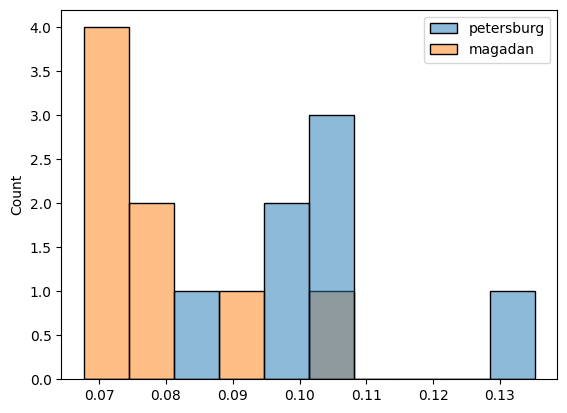

In [360]:
import seaborn as sns
sns.histplot(df, bins=10)

Зависимая переменная (размер раковин мидий) является количественной. Группы происходят из разных совокупностей(городов). Следовательно, мы используем независимый T-тест.

In [361]:
from scipy.stats import ttest_ind

def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(df['petersburg'], df['magadan'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(df)


*** Результаты независимого T-теста ***
nan <= 0.05. Мы отвергаем нулевую гипотезу. Данные не распределены нормально (мы отвергаем H0)


Судя по гистограмме, а также по результатам независимого Т-теста данные в датафрейме не имеют нормальногор распределения.

In [362]:
df.corr(method = 'spearman')

,petersburg,magadan
petersburg,1.000000,0.142857
magadan,0.142857,1.000000


Поскольку данные не имеют нормального распределения, а переменные являются количественными, я использовал корреляционный тест Спирмена, чтобы проверить связь между данными из Петебурга и Магадана. Как мы видим, связь между данными практически отсутствует.

Далее необходимо вычислить разницу в размерах раковин мидий, выращенных в разных городах. Для этого посчитаем средние значения, а затем сравним их.

In [363]:
pet = df['petersburg'].mean()
pet

0.10344285714285714

In [364]:
mag = df['magadan'].mean()
mag

0.0780125

In [365]:
pet/mag

1.3259779797193674

Средний размер раковин мидий, выращенных в Петербурге превышает размер раковин Магаданских мидий на 32%. Отобразим эту информацию на графике.

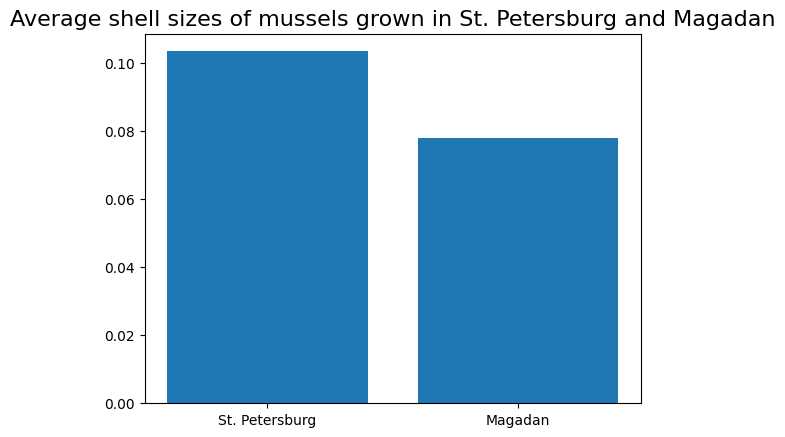

In [366]:
import matplotlib.pyplot as plt
names = ['St. Petersburg', 'Magadan']
values = [pet, mag]
plt.bar(names, values)
plt.title('Average shell sizes of mussels grown in St. Petersburg and Magadan', fontsize=16)
plt.show()

Общий вывод по домашнему заанию:
В целом мы можем сказать, что распределение данных не является нормальным, а нулевая гипотеза может быть смело отвергнута. Это подтверждается различными тестами, а также визуализацией данных. Корреляция Спирмена показала, что зависимость между данными практически отсутсвует. 
Размер раковин мидий, варыщенных в Петербурге значительно превышает размер раковин миий, выращенных в Магадане.

_____

# Бонус

Скачаем датасет, содержащий информацию по давлению 120 человек.



In [367]:
#import wget
#url2 = 'https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/blood_pressure.csv'
#blood = wget.download(url2)
#print(blood)

In [368]:
blood = pd.read_csv('https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/blood_pressure.csv')
blood

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [369]:
print('Размер выборки: ', blood.shape)

Размер выборки:  (120, 5)


In [370]:
blood.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


## Z-тест

Проведем Z-тест для проверки двух независимых групп данных на равенство средних значений выборок.

In [371]:
from statsmodels.stats import weightstats

In [372]:
_ ,p = weightstats.ztest(blood['bp_before'], x2=blood['bp_after'], value=0,alternative='two-sided')
print(float(p))


if p < 0.05:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")

0.002162306611369422
Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.


## Z-тест на пропорцию

Z-критерий одной пропорции используется для сравнения наблюдаемой пропорции с теоретической.

В этом тесте используются следующие нулевые гипотезы:

$H_0: p = p_0$ (доля мужчин, предоставивших данные о своем давлении, равна гипотетической пропорции $p_0$)

Альтернативная гипотеза может быть двусторонней, левосторонней или правосторонней:

$H_1 (двусторонний): p ≠ p_0$ (доля мужчин не равна некоторому гипотетическому значению $p_0$)
$H_1 (левосторонний): p < p_0$ (доля мужчин меньше некоторого гипотетического значения $p_0$)
$H_1 (правосторонний): p > p_0$ (доля мужчин больше некоторого гипотетического значения $p_0$)

Предположим, что доля мужчин в нашем датачете равна 40%.

$p_0$: гипотетическая доля мужчин = 0.40

$x$: число мужчин в выборке мужчин: `len(data[data.sex == 'Male'])`

$n$: размер выборки = `len(data)`

Покажем, как использовать функцию `proportions_ztest` для выполнения  **z-теста**:

In [373]:
p_0 = 0.4
n = len(blood)
x = len(blood[blood.sex == 'Male'])

print(n, x)

120 60


In [374]:
from statsmodels.stats.proportion import proportions_ztest

#perform one proportion z-test
_, p = proportions_ztest(count=x, nobs=n, value=p_0)

In [375]:
if p < 0.05:
    print("Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.
